# Brewery & Pub Intro Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# read the data 
df = pd.read_csv("data/Brewery_pub.csv")
df.head()

,address,categories,city,country,key,lat,long,name,phones,postalCode,province,websites
0,407 Radam Ln,brewery,Austin,US,us/tx/austin/407radamln,NaN,NaN,(512) Brewing Co,5127072337,78745,TX,NaN
1,1135 N W Galveston Ave,Brewery and Bar,Bend,US,us/or/bend/1135nwgalvestonave,NaN,NaN,"10 Barrel Brewing Company, 10 Barrel Brewing Co","(541) 585-1007, 5415851007",97703,OR,10barrel.com
2,830 W Bannock St,"brewery, Restaurant, Pub, Brewery, pub, Brewer...",Boise,US,us/id/boise/830wbannockst,43.617711,-116.202883,"10 Barrel Brewing, 10 Barrel Brewing Co.","(208) 344-5870, 2083445870, 2.08344587E9",83702,ID,10barrel.com
3,1022 Texan Trl,"Wine Tours & Tastings, Food & Drink, Tours, Br...",Grapevine,US,us/tx/grapevine/1022texantrl,32.938385,-97.064340,10 Gallon Tours,"18174031832, 817 403-1832",76051,TX,http://www.10gallontours.com/
4,Po Box 135,"American Restaurants, Bar & Grill Restaurants,...",Villard,US,us/mn/villard/pobox135,NaN,NaN,10 Mile Tavern,3205542939,56385,MN,http://www.10miletavern.com


In [3]:
print(f"Total filas: ", df.shape[0])
print(f"Total columnas: ", df.shape[1])

Total filas:  7375
Total columnas:  12


In [4]:
# verify the data type
df.dtypes

address        object
categories     object
city           object
country        object
key            object
lat           float64
long          float64
name           object
phones         object
postalCode     object
province       object
websites       object
dtype: object

In [5]:
# verify NaN values per column
df.isna().sum()

address          0
categories       0
city             0
country          0
key              0
lat           1961
long          1959
name             0
phones        1216
postalCode     103
province         0
websites      3827
dtype: int64

In [6]:
# select columns
print(df.columns)
columns = [4,8,11]
df.drop(df.columns[columns], axis=1, inplace=True)
df

Index(['address', 'categories', 'city', 'country', 'key', 'lat', 'long',
       'name', 'phones', 'postalCode', 'province', 'websites'],
      dtype='object')


,address,categories,city,country,lat,long,name,postalCode,province
0,407 Radam Ln,brewery,Austin,US,NaN,NaN,(512) Brewing Co,78745,TX
1,1135 N W Galveston Ave,Brewery and Bar,Bend,US,NaN,NaN,"10 Barrel Brewing Company, 10 Barrel Brewing Co",97703,OR
2,830 W Bannock St,"brewery, Restaurant, Pub, Brewery, pub, Brewer...",Boise,US,43.617711,-116.202883,"10 Barrel Brewing, 10 Barrel Brewing Co.",83702,ID
3,1022 Texan Trl,"Wine Tours & Tastings, Food & Drink, Tours, Br...",Grapevine,US,32.938385,-97.064340,10 Gallon Tours,76051,TX
4,Po Box 135,"American Restaurants, Bar & Grill Restaurants,...",Villard,US,NaN,NaN,10 Mile Tavern,56385,MN
...,...,...,...,...,...,...,...,...,...
7370,512 E Main St,Breweries,Montrose,US,38.480219,-107.875247,Zulu Brewing Co,81401,CO
7371,3232 Monroe Ave,"Food & Drink, Breweries",Waukegan,US,42.363495,-87.880620,Zumbier,60085,IL
7372,1038 Lafayette Ave,"Bars & Clubs, Brew Pubs, Restaurants, Brewery,...",Columbus,US,39.208796,-85.918737,Zwanzigz Pizza,47201,IN
7373,4612 S Mason St,"Performing Arts Venue, Brewery",Fort Collins,US,NaN,NaN,Zwei Brewing,80525,CO


In [7]:
# total countries
print(df.country.unique())
print(f"Total country: ", len(df.country.unique()))

['US']
Total country:  1


In [8]:
# total provinces
print(df.province.unique())
print(f"Total provinces: ", len(df.province.unique()))
# see that there are provinces that do not belong to the United States

['TX' 'OR' 'ID' 'MN' 'CA' 'CO' 'WA' 'MI' 'VT' 'NJ' 'DE' 'NY' 'IN' 'AZ'
 'PA' 'WV' 'ME' 'VA' 'KS' 'MO' 'WI' 'MT' 'FL' 'DC' 'IL' 'KY' 'OK' 'TN'
 'AK' 'GA' 'IA' 'AR' 'NH' 'OH' 'CT' 'MA' 'NC' 'LA' 'AL' 'WY' 'SC' 'NV'
 'HI' 'NM' 'AU-WA' 'NE' 'MD' 'UT' 'ND' 'RI' 'SD' 'Denver' 'AB' 'NL' 'MS'
 'Los Angeles' 'San Diego' 'Pittsburgh' 'St. Louis' 'Sacramento' 'ON'
 'Tampa']
Total provinces:  62


In [9]:
# changue the country
#Canada
df.loc[(df.province.isin(['AB', 'NL', 'ON'])), 'country']= "CAN"

In [10]:
# total countries
print(df.country.unique())
print(f"Total country: ", len(df.country.unique()))

['US' 'CAN']
Total country:  2


In [11]:
# total cities
print(df.city.unique())
print(f"Total provinces: ", len(df.city.unique()))

['Austin' 'Bend' 'Boise' ... 'Sandown' 'Waukegan' 'Eastampton']
Total provinces:  2585


In [12]:
# total postal code
print(df.postalCode.unique())
print(f"Total postal Code: ", len(df.postalCode.unique()))

['78745' '97703' '83702' ... '50533-1411' '3873' '60085']
Total postal Code:  4806


In [13]:
# total categories
print(len(df.categories.unique()))
print(f"Total postal categories: ", len(df.categories.unique()))

4323
Total postal categories:  4323


### Let's get the brewery and pub count per city

In [14]:
brewery_by_city = df['city'].value_counts().to_frame().reset_index().head(15)

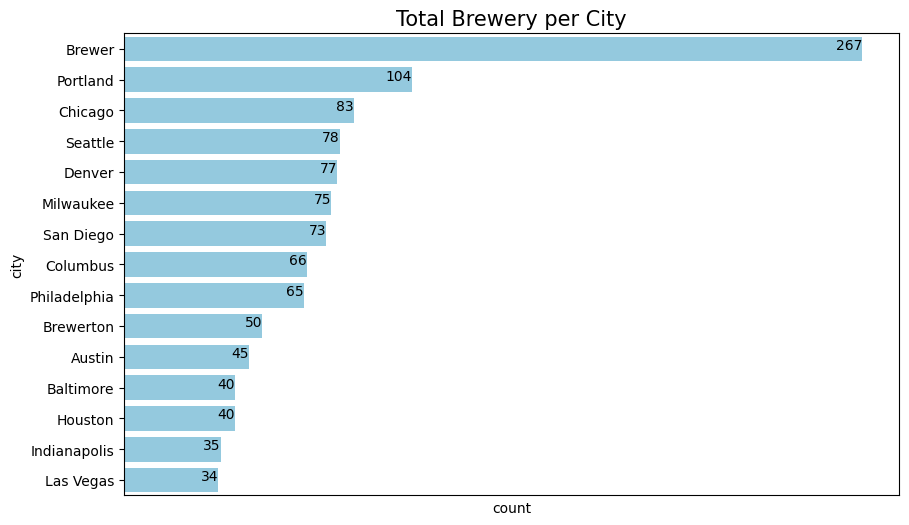

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=brewery_by_city, x='count', y='city', color="skyblue")
for index, value in enumerate(brewery_by_city['count']):
    plt.text(value, index, str(value), color='black', ha="right")
plt.title("Total Brewery per City", fontsize=15)
plt.xticks([],[])
plt.show()

### Let's get the brewery and pub count per province

In [16]:
brewery_by_province = df['province'].value_counts().to_frame().reset_index().head(15)

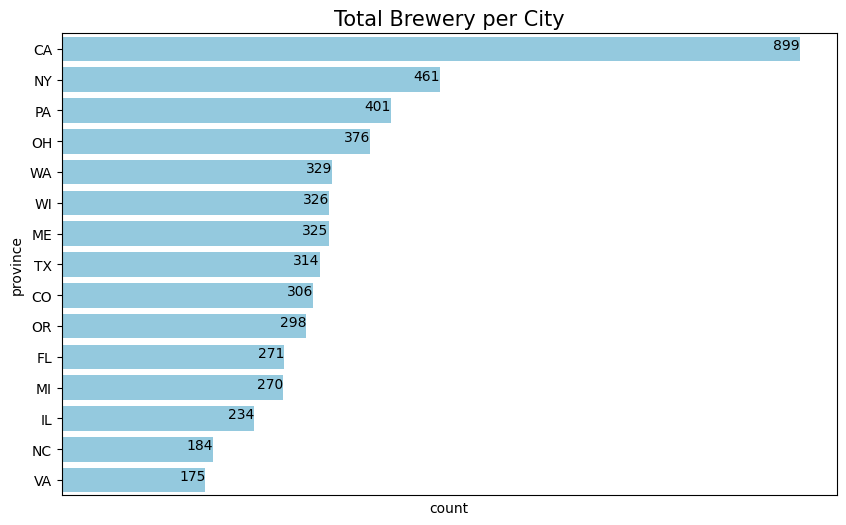

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=brewery_by_province, x='count', y='province', color="skyblue")
for index, value in enumerate(brewery_by_province['count']):
    plt.text(value, index, str(value), color='black', ha="right")
plt.title("Total Brewery per City", fontsize=15)
plt.xticks([],[])
plt.show()

### Let's get the brewery and pub count per postalcode

In [18]:
brewery_by_postalcode = df['postalCode'].value_counts().to_frame().reset_index().head(15)

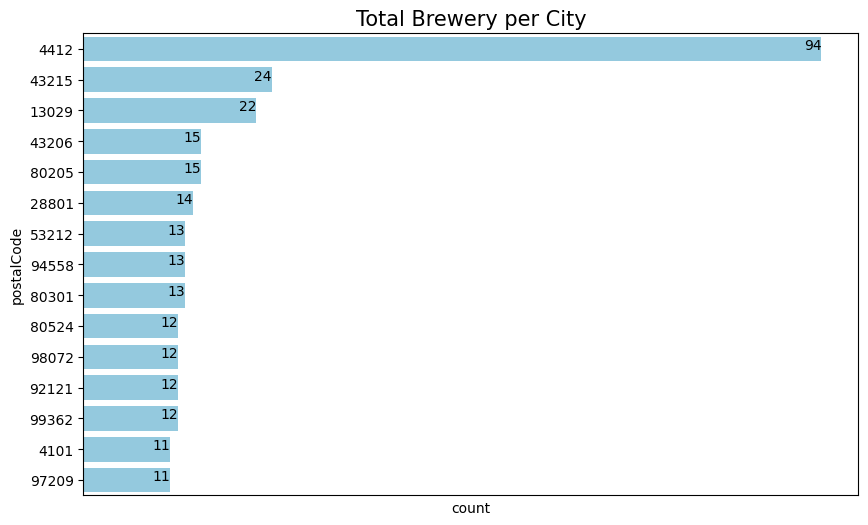

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=brewery_by_postalcode, x='count', y='postalCode', color="skyblue")
for index, value in enumerate(brewery_by_postalcode['count']):
    plt.text(value, index, str(value), color='black', ha="right")
plt.title("Total Brewery per City", fontsize=15)
plt.xticks([],[])
plt.show()

### Now let's check the most popular category of Breweries and Pubs

In [20]:
# add column indicating the number of categories per brewery
def num_categories(row):
    size = len(row.split(', '))
    return size

df['num_categories'] = df['categories'].apply(num_categories)
df['num_categories'] = df['num_categories'].astype('object')

In [21]:
# see that there are several breweries with more than 20 categories
df['num_categories'].value_counts()

num_categories
1     1841
2     1178
3      952
4      554
5      486
6      382
7      335
8      297
9      246
10     208
11     186
12     181
13     132
14      90
15      80
16      54
18      39
17      34
19      25
20      17
22       9
21       9
23       7
25       5
28       4
34       3
26       3
24       3
27       3
29       3
36       2
38       2
30       1
33       1
32       1
52       1
37       1
Name: count, dtype: int64

In [22]:
top_10_num_categories = df['num_categories'].value_counts().head(15).to_frame().reset_index()
top_10_num_categories

,num_categories,count
0,1,1841
1,2,1178
2,3,952
3,4,554
4,5,486
5,6,382
6,7,335
7,8,297
8,9,246
9,10,208


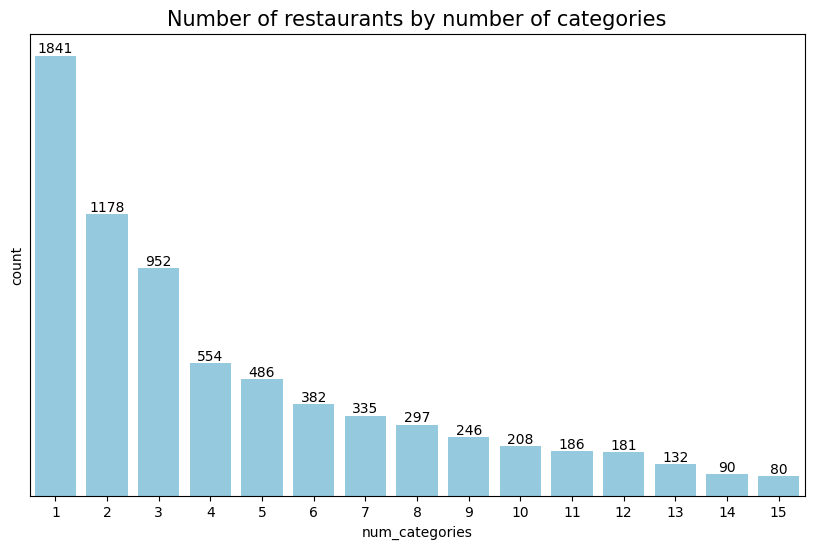

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_num_categories, y='count', x='num_categories', color="skyblue")
plt.title("Number of restaurants by number of categories", fontsize=15)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.yticks([],[])
plt.show()

In [24]:
df[df['num_categories']==37]

,address,categories,city,country,lat,long,name,postalCode,province,num_categories
7322,3505 Pacific Ave,"Prewedding Parties, Asian Restaurants, America...",Forest Grove,US,45.521561,-123.086103,"Yardhouse Pub - Grand Lodge, Mcmenamins Grand ...",97116,OR,37


In [25]:
df[df['num_categories']==37]['categories'].to_list()

['Prewedding Parties, Asian Restaurants, American Restaurants, Spa, Wedding Planners, Travel and Tourism, Wedding Venues, Wedding Reception, Wedding Reception Venues, Personal Care, Hotels and Lodging, bar drinks, Mediterranean Restaurants, Food and Beverage, Pub, Wedding Hairstyles, Entertainment, Bar, American Restaurant and Brewery, Restaurants, Pub and Brewery, Hotel, Movie Theaters, food catering, Bar and Restaurant, Restaurant, Rehearsal Dinners, Day Spas, Japanese Restaurants, Brewery, Burger Joint, Hotel, Movie Theater, and Spa, Wedding Events, Engagement Parties, Arts and Entertainment']

In [26]:
# unique categories
all_categories = sum(df['categories'].str.split(', '), [])
all_categories
unique_categories = list(set(all_categories))
print(unique_categories)

['', 'Ellet', 'Grill Restaurants', 'Fast Food Restaurant', 'Civic', 'Leagues and Clubs', 'Morristown', 'Brewery Highland', 'and Karaoke Bar Turtle Bay', 'Durable Goods', 'Pittsburgh Bottlers', 'Hotel & Motel Reservations', 'Home Repair & Improvement', 'Community Organizations', 'passenger', 'Brewer Paper Coated or Laminated For Packaging', 'City Offices', 'Fairbanks Government Offices-state', 'Internet Cafe', 'Marketing and Pr', "Contractors' Equipment & Supplies", 'Hardware Wholesale & Manufacturers', 'Brewer Churches', ' Stone Setting', 'Barnstable', 'Pub Food', 'All Bars Pubs & Clubs', 'Fitness Apparel', 'Liquor Store Camelback East', 'Silverton Restaurants', 'Meeting & Event Planning Services', 'Farming and Ranching', 'Hamilton', 'solrjson:Maine', 'Anniston Beer and Other Fermented Malt Liquors', 'bottlers equipment & supplies', 'bar & grill restaurants', '\\\\",\\\\"Home\\\\",\\\\"Illinois\\\\",\\\\"Carbondale\\\\",\\\\"Wholesale Trade-durable Goods\\\\",\\\\"Industrial machinery 

### Get the most common brewery and pub categories

In [27]:
brewery_categories = df['categories'].value_counts().to_frame().reset_index().head(15)

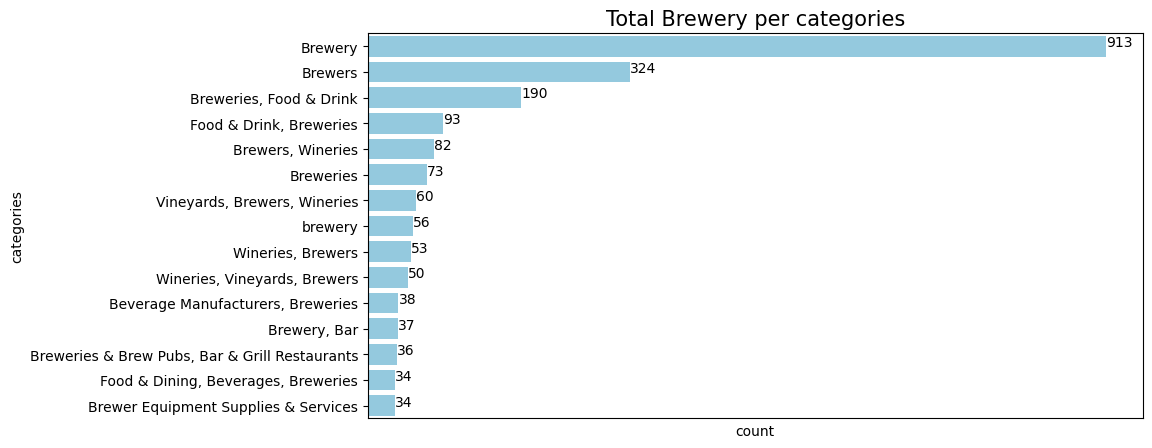

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(data=brewery_categories, x="count", y="categories", color="skyblue")
for index,value in enumerate(brewery_categories['count']):
    plt.text(value,index, str(value), color="black")
plt.title("Total Brewery per categories", fontsize=15)
plt.xticks([],[])
plt.show()

### Now let's visualize the state counts on a map

In [29]:
import plotly.graph_objects as go

brewery_by_province = df['province'].value_counts().to_frame().reset_index()

brewery_by_province['text'] = brewery_by_province['province'] + '<br>' + \
    'Number of Breweries: ' + brewery_by_province['count'].astype(str)

fig = go.Figure(data=go.Choropleth(
    locations=brewery_by_province['province'],
    z=brewery_by_province['count'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=True,
    text=brewery_by_province['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Number of Breweries"
))

fig.update_layout(
    title_text='Number of Breweries per State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()